In [4]:
import numpy as np
import scipy as sc
import random
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [56]:
# Параметры системы
I1 = 0.25  # Момент инерции бедра (кг·м²)
I2 = 0.1   # Момент инерции протеза (кг·м²)
m1 = 10.0  # Масса бедра (кг)
m2 = 2.0   # Масса протеза (кг)
r1 = 0.3   # Расстояние от оси вращения до центра масс бедра (м)
r2 = 0.2   # Расстояние от оси вращения до центра масс протеза (м)
l1 = 0.4   # Длина бедра (м)
g = 9.81   # Ускорение свободного падения (м/с²)
Q1 = 0.0   # Обобщенная сила для бедра
Q2 = 0.0   # Обобщенная сила для протеза

# Параметры поршня
r = 0.05   # Радиус поршня (м)
d = 0.02   # Расстояние (м)
L = 0.1    # Длина (м)

c = 3   # Коэффициент

In [69]:
# Функция для вычисления производных
def system(t, y,):
    q1, q2, d_q1, d_q2 = y  # Распаковываем переменные

    c = r * np.cos(d_q2) + np.sqrt(2 * r**2 * np.sin(d_q2)**2 - d**2 + d * r * np.cos(d_q2) - r**2 + L**2) #dh

    Q2 = - c**2 * d_q2
    # Уравнения для угловых ускорений
    # Матрица коэффициентов
    A = np.array([
        [I1 + m1*r1**2 + m2*l1**2, m2*l1*r2*np.cos(q1 - q2)],
        [m2*l1*r2*np.cos(q1 - q2), I2 + m2*r2**2]
    ])

    # Вектор правой части (исправленный)
    b1 = Q1 - (m1*r1 + m2*l1)*g*np.sin(q1) + m2*l1*r2*np.sin(q1 - q2)*(d_q1*d_q2 + d_q2**2)
    b2 = Q2 - m2*g*r2*np.sin(q2) + m2*l1*r2*np.sin(q1 - q2)*d_q1**2 
    B = np.array([b1, b2])

    # Решаем систему линейных уравнений для угловых ускорений
    alpha1, alpha2 = np.linalg.solve(A, B)

    return [d_q1, d_q2, alpha1, alpha2]

In [70]:
# Начальные условия
q1_0 = np.pi / 6  # Начальный угол первого тела (30 градусов)
q2_0 = 0  # Начальный угол второго тела (0 градусов)
d_q1_0 = 0.0  # Начальная угловая скорость первого тела
d_q2_0 = 0.0  # Начальная угловая скорость второго тела
y0 = [q1_0, q2_0, d_q1_0, d_q2_0]

In [76]:
# Временной интервал
t_max = 1000
t_span = (0, t_max)  # От 0 до 10 секунд
t_eval = np.linspace(0, t_max, 1000)  # Точки для вывода решения

# Решение системы
sol = solve_ivp(system, t_span, y0, t_eval=t_eval, method='RK45')

# Результаты
q1 = sol.y[0]  # Угол первого тела
q2 = sol.y[1]  # Угол второго тела
d_q1 = sol.y[2]  # Угловая скорость первого тела
d_q2 = sol.y[3]  # Угловая скорость второго тела
t = sol.t  # Время

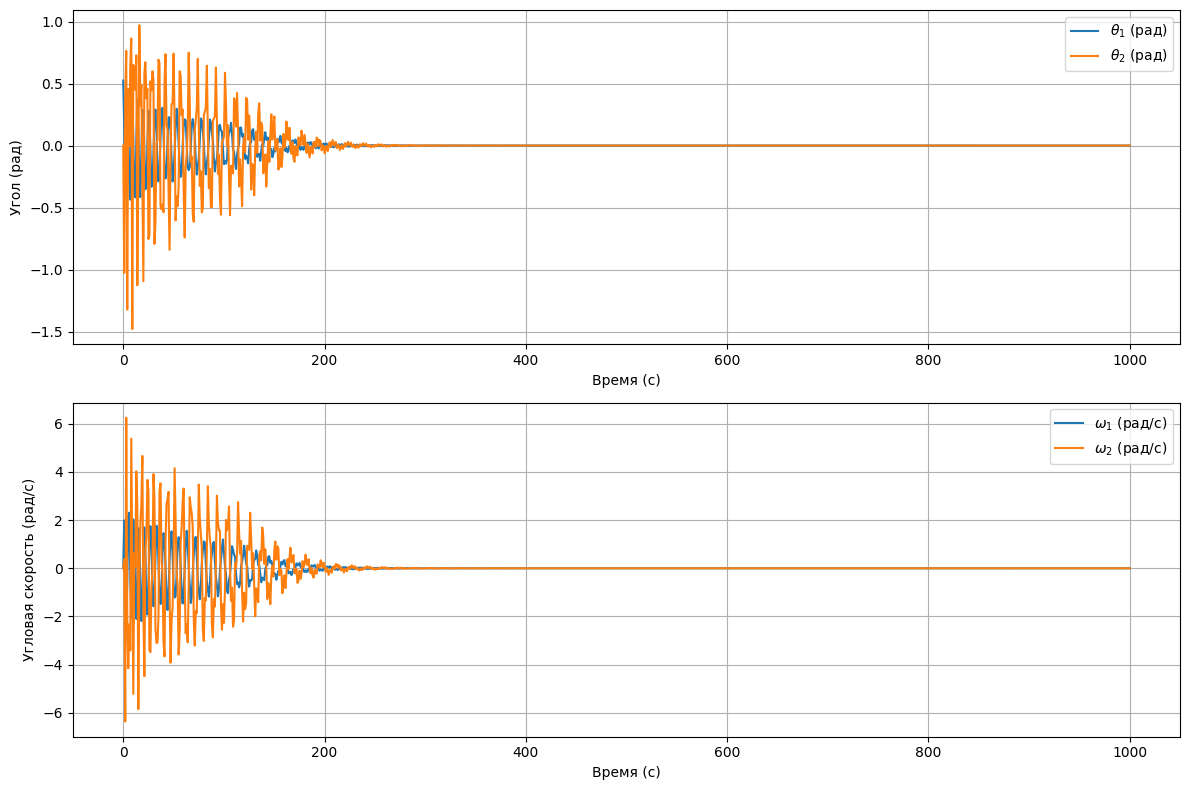

In [77]:
# Построение графиков
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(t, q1, label=r'$\theta_1$ (рад)')
plt.plot(t, q2, label=r'$\theta_2$ (рад)')
plt.xlabel('Время (с)')
plt.ylabel('Угол (рад)')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, d_q1, label=r'$\omega_1$ (рад/с)')
plt.plot(t, d_q2, label=r'$\omega_2$ (рад/с)')
plt.xlabel('Время (с)')
plt.ylabel('Угловая скорость (рад/с)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()